## Importing The Required Packages

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

## Loading the dataset 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


* MNIST Dataset has been loaded using tensorflow keras API.
* This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
* **x_train:** NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.
* **y_train:** NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.
* **x_test:** NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.
* **y_test:** NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.
* Pixel values range from 0 to 255.

## Reshaping the dataset

In [3]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Normalizing the data

In [4]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train = x_train/255.0
x_test = x_test/255.0

* Normalization helps in better learning speed and faster performance.
* It reduces variance and gives same range to all input features.
* Since our dataset sets all inputs to 0 - 255, normalizating only helps reducing variances.

## Displaying some images

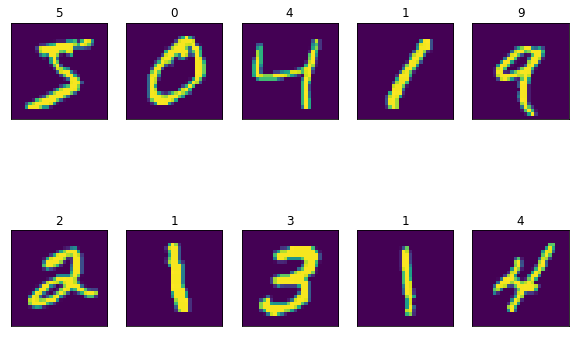

In [5]:
fig = plt.figure(figsize=(10, 7))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks =[], yticks=[])
    ax.imshow(x_train[i])
    ax.set_title(y_train[i])

## Splitting the train data into train and validation data

In [6]:
x_val = x_train[50000 : 60000]
x_train = x_train[0 : 50000]
y_val = y_train[50000 : 60000]
y_train = y_train[0 : 50000]

print("Train data has " + str(x_train.shape[0]) + " samples.")
print("validation data has " + str(x_val.shape[0]) + " samples.")

Train data has 50000 samples.
validation data has 10000 samples.


* Validation during training give advantages.
* It check the performance of training based on validation score.
* We can apply **early stopping** when validation score doesn't improve while train score goes up.
* Overcome **overfitting**.

## Building The Model

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1200)             

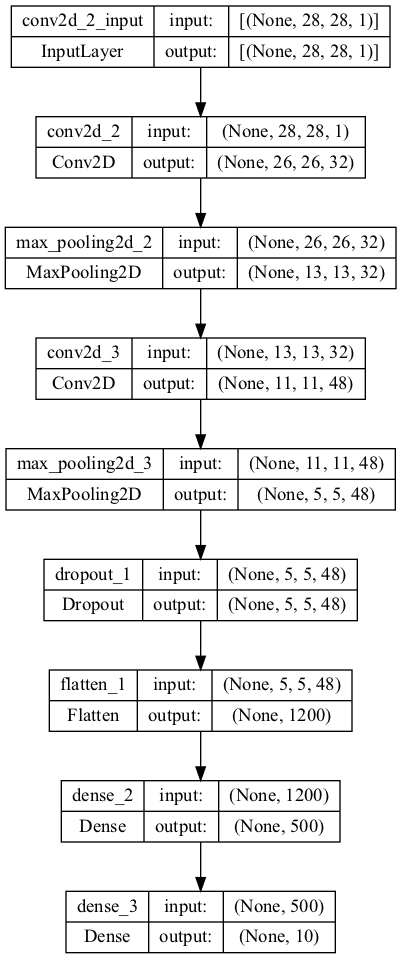

In [11]:
plot_model(model, 'models/model_cnn.png', show_shapes=True)

In [12]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=15, batch_size=128, verbose=1, validation_data=(x_val, y_val))

Epoch 1/15
391/391 [==============================] - 4s 10ms/step - loss: 0.0144 - accuracy: 0.9951 - val_loss: 0.0302 - val_accuracy: 0.9919
Epoch 2/15
391/391 [==============================] - 4s 10ms/step - loss: 0.0128 - accuracy: 0.9954 - val_loss: 0.0334 - val_accuracy: 0.9926
Epoch 3/15
391/391 [==============================] - 4s 10ms/step - loss: 0.0124 - accuracy: 0.9957 - val_loss: 0.0311 - val_accuracy: 0.9931
Epoch 4/15
391/391 [==============================] - 4s 10ms/step - loss: 0.0120 - accuracy: 0.9958 - val_loss: 0.0364 - val_accuracy: 0.9915
Epoch 5/15
391/391 [==============================] - 4s 10ms/step - loss: 0.0103 - accuracy: 0.9966 - val_loss: 0.0369 - val_accuracy: 0.9914
Epoch 6/15
391/391 [==============================] - 4s 10ms/step - loss: 0.0116 - accuracy: 0.9959 - val_loss: 0.0274 - val_accuracy: 0.9929
Epoch 7/15
391/391 [==============================] - 4s 10ms/step - loss: 0.0108 - accuracy: 0.9961 - val_loss: 0.0320 - val_accuracy: 0.9929

In [15]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0312 - accuracy: 0.9921


In [16]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.031204747036099434
Test accuracy: 0.9921000599861145


In [18]:
model.save('models/digit_model.h5')

In [19]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,"models/")